In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
data = pd.read_csv('SpiderLong.csv')

In [77]:
data.head()

,Group,Anxiety
0,Picture,30
1,Picture,35
2,Picture,45
3,Picture,40
4,Picture,50


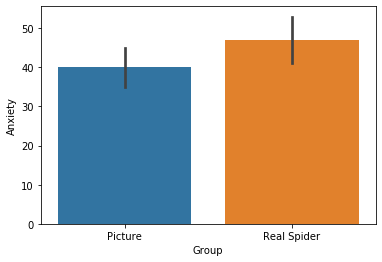

In [78]:
_ = sns.barplot(x='Group', y='Anxiety' , data=data)

In [79]:
print(data.groupby('Group').mean())

             Anxiety
Group               
Picture           40
Real Spider       47


In [80]:
print(data.groupby('Group').std())

               Anxiety
Group                 
Picture       9.293204
Real Spider  11.028888


In [81]:
print(data.groupby('Group').count())

             Anxiety
Group               
Picture           12
Real Spider       12


In [82]:
data_wide = pd.read_csv('SpiderWide.csv')
data_wide.head()

,picture,real
0,30,40
1,35,35
2,45,50
3,40,55
4,50,65


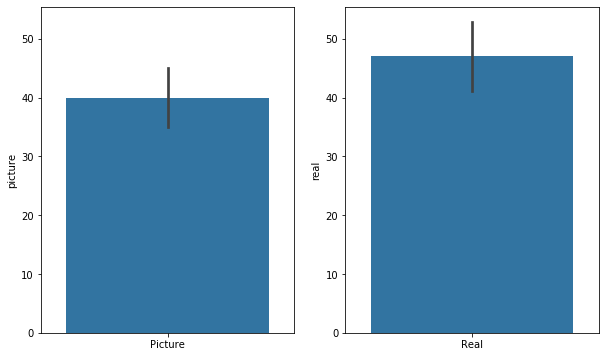

In [83]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,2,1)
_ = sns.barplot(x=['Picture' for i in range(len(data_wide))] , y='picture' , data=data_wide)
ax2 = plt.subplot(1,2,2,sharey = ax1)
_ = sns.barplot(x=['Real' for i in range(len(data_wide))] , y='real' , data=data_wide)

In [84]:
data_wide['Mean'] = (data_wide['picture'] + data_wide['real'])/2

In [85]:
data_wide.head()

,picture,real,Mean
0,30,40,35.0
1,35,35,35.0
2,45,50,47.5
3,40,55,47.5
4,50,65,57.5


In [86]:
grand_array = np.concatenate((np.array(data_wide['picture']) ,np.array(data_wide['real'])))

In [87]:
grand_mean = np.mean(grand_array)

In [88]:
grand_mean

43.5

In [89]:
data_wide['adj'] = grand_mean - data_wide['Mean']

In [90]:
data_wide['picture_adj'] = data_wide['picture'] + data_wide['adj']
data_wide['real_adj'] = data_wide['real'] + data_wide['adj']

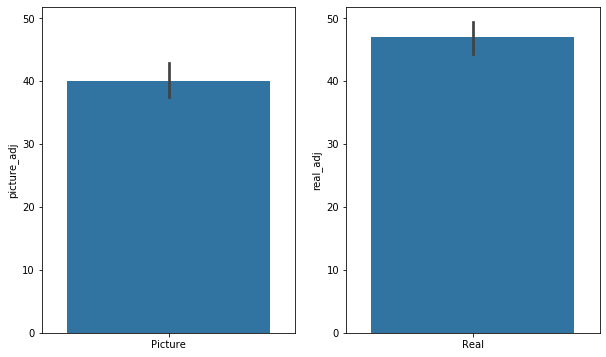

In [91]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,2,1)
_ = sns.barplot(x=['Picture' for i in range(len(data_wide))] , y='picture_adj' , data=data_wide)
ax2 = plt.subplot(1,2,2,sharey = ax1)
_ = sns.barplot(x=['Real' for i in range(len(data_wide))] , y='real_adj' , data=data_wide)

## **The t-test**

### **i) The independent t-test**

#### ***using the variance sum law, which states that the variance of a difference between two independent variables is equal to the sum of their variances***

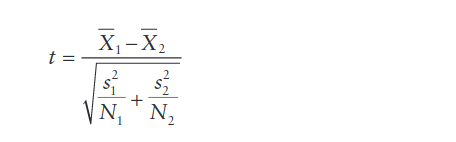

In [92]:
# when sample size are equal , using unpooled approach
from IPython.display import Image

Image('t_test1.png')

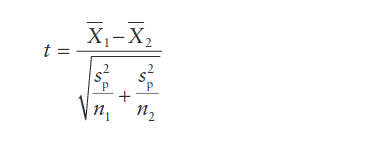

In [93]:
# when sample size are unequal, using pooled approach

Image('t_test2.png')



where s_p is 


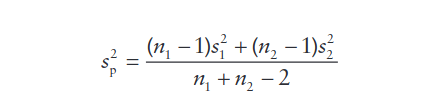

In [94]:
print('where s_p is ')


Image('t_test3.png')

#### **computing t**

In [95]:
data.head()

,Group,Anxiety
0,Picture,30
1,Picture,35
2,Picture,45
3,Picture,40
4,Picture,50


In [96]:
x1 = np.array(data.groupby('Group').mean().iloc[0])[0]
x2 = np.array(data.groupby('Group').mean().iloc[1])[0]

In [97]:
sd1 = np.array(data.groupby('Group').std().iloc[0])[0]
sd2 = np.array(data.groupby('Group').std().iloc[1])[0]

In [98]:
n1 = np.array(data.groupby('Group').count().iloc[0])[0]
n2 = np.array(data.groupby('Group').count().iloc[1])[0]

In [99]:
def t_test_from_means(x1, x2, sd1, sd2, n1, n2):
    dof = n1 + n2 - 2
    pooled_variance = ((n1-1)*(sd1**2) + (n2-1)*(sd2**2))/dof
    se = np.sqrt((pooled_variance/n1) + (pooled_variance/n2))
    return (x1-x2)/se

In [100]:
t_test_from_means(x1, x2, sd1, sd2, n1, n2)

-1.681345614953415

In [101]:
import scipy.stats as st

In [102]:
data_p = data[data['Group'] == 'Picture']
data_r = data[data['Group'] == 'Real Spider']

In [103]:
st.ttest_ind(data_p['Anxiety'], data_r['Anxiety'], equal_var=False)

Ttest_indResult(statistic=-1.681345614953415, pvalue=0.10724404654267576)

In [104]:
st.ttest_ind(data_p['Anxiety'], data_r['Anxiety'], equal_var=True)

Ttest_indResult(statistic=-1.681345614953415, pvalue=0.10683919238259681)

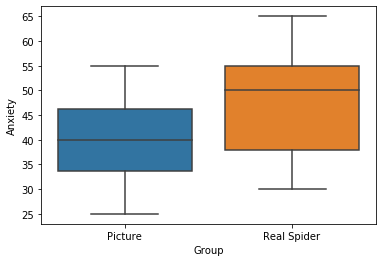

In [105]:
_ = sns.boxplot(x='Group', y='Anxiety', data=data)

In [106]:
st.describe(data_p['Anxiety'])

DescribeResult(nobs=12, minmax=(25, 55), mean=40.0, variance=86.36363636363636, skewness=0.0, kurtosis=-1.0886426592797789)

In [107]:
st.describe(data_r['Anxiety'])

DescribeResult(nobs=12, minmax=(30, 65), mean=47.0, variance=121.63636363636364, skewness=-0.0063701397822023996, kurtosis=-1.1669850590198878)

### **Robust methods to compare independent means**

In [108]:
st.ranksums(data_p['Anxiety'], data_r['Anxiety'])

RanksumsResult(statistic=-1.5011106998930268, pvalue=0.13332693177434943)

In [109]:
st.mannwhitneyu(data_p['Anxiety'], data_r['Anxiety'])

MannwhitneyuResult(statistic=46.0, pvalue=0.06861291715394628)

#### n short, above robust methods suggest that the type of spider stimulus does not affect anxiety.

### **Doing Mann Whitney U Test (Wilcoxon Rank Sum Test) mathematically**

#### https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric4.html

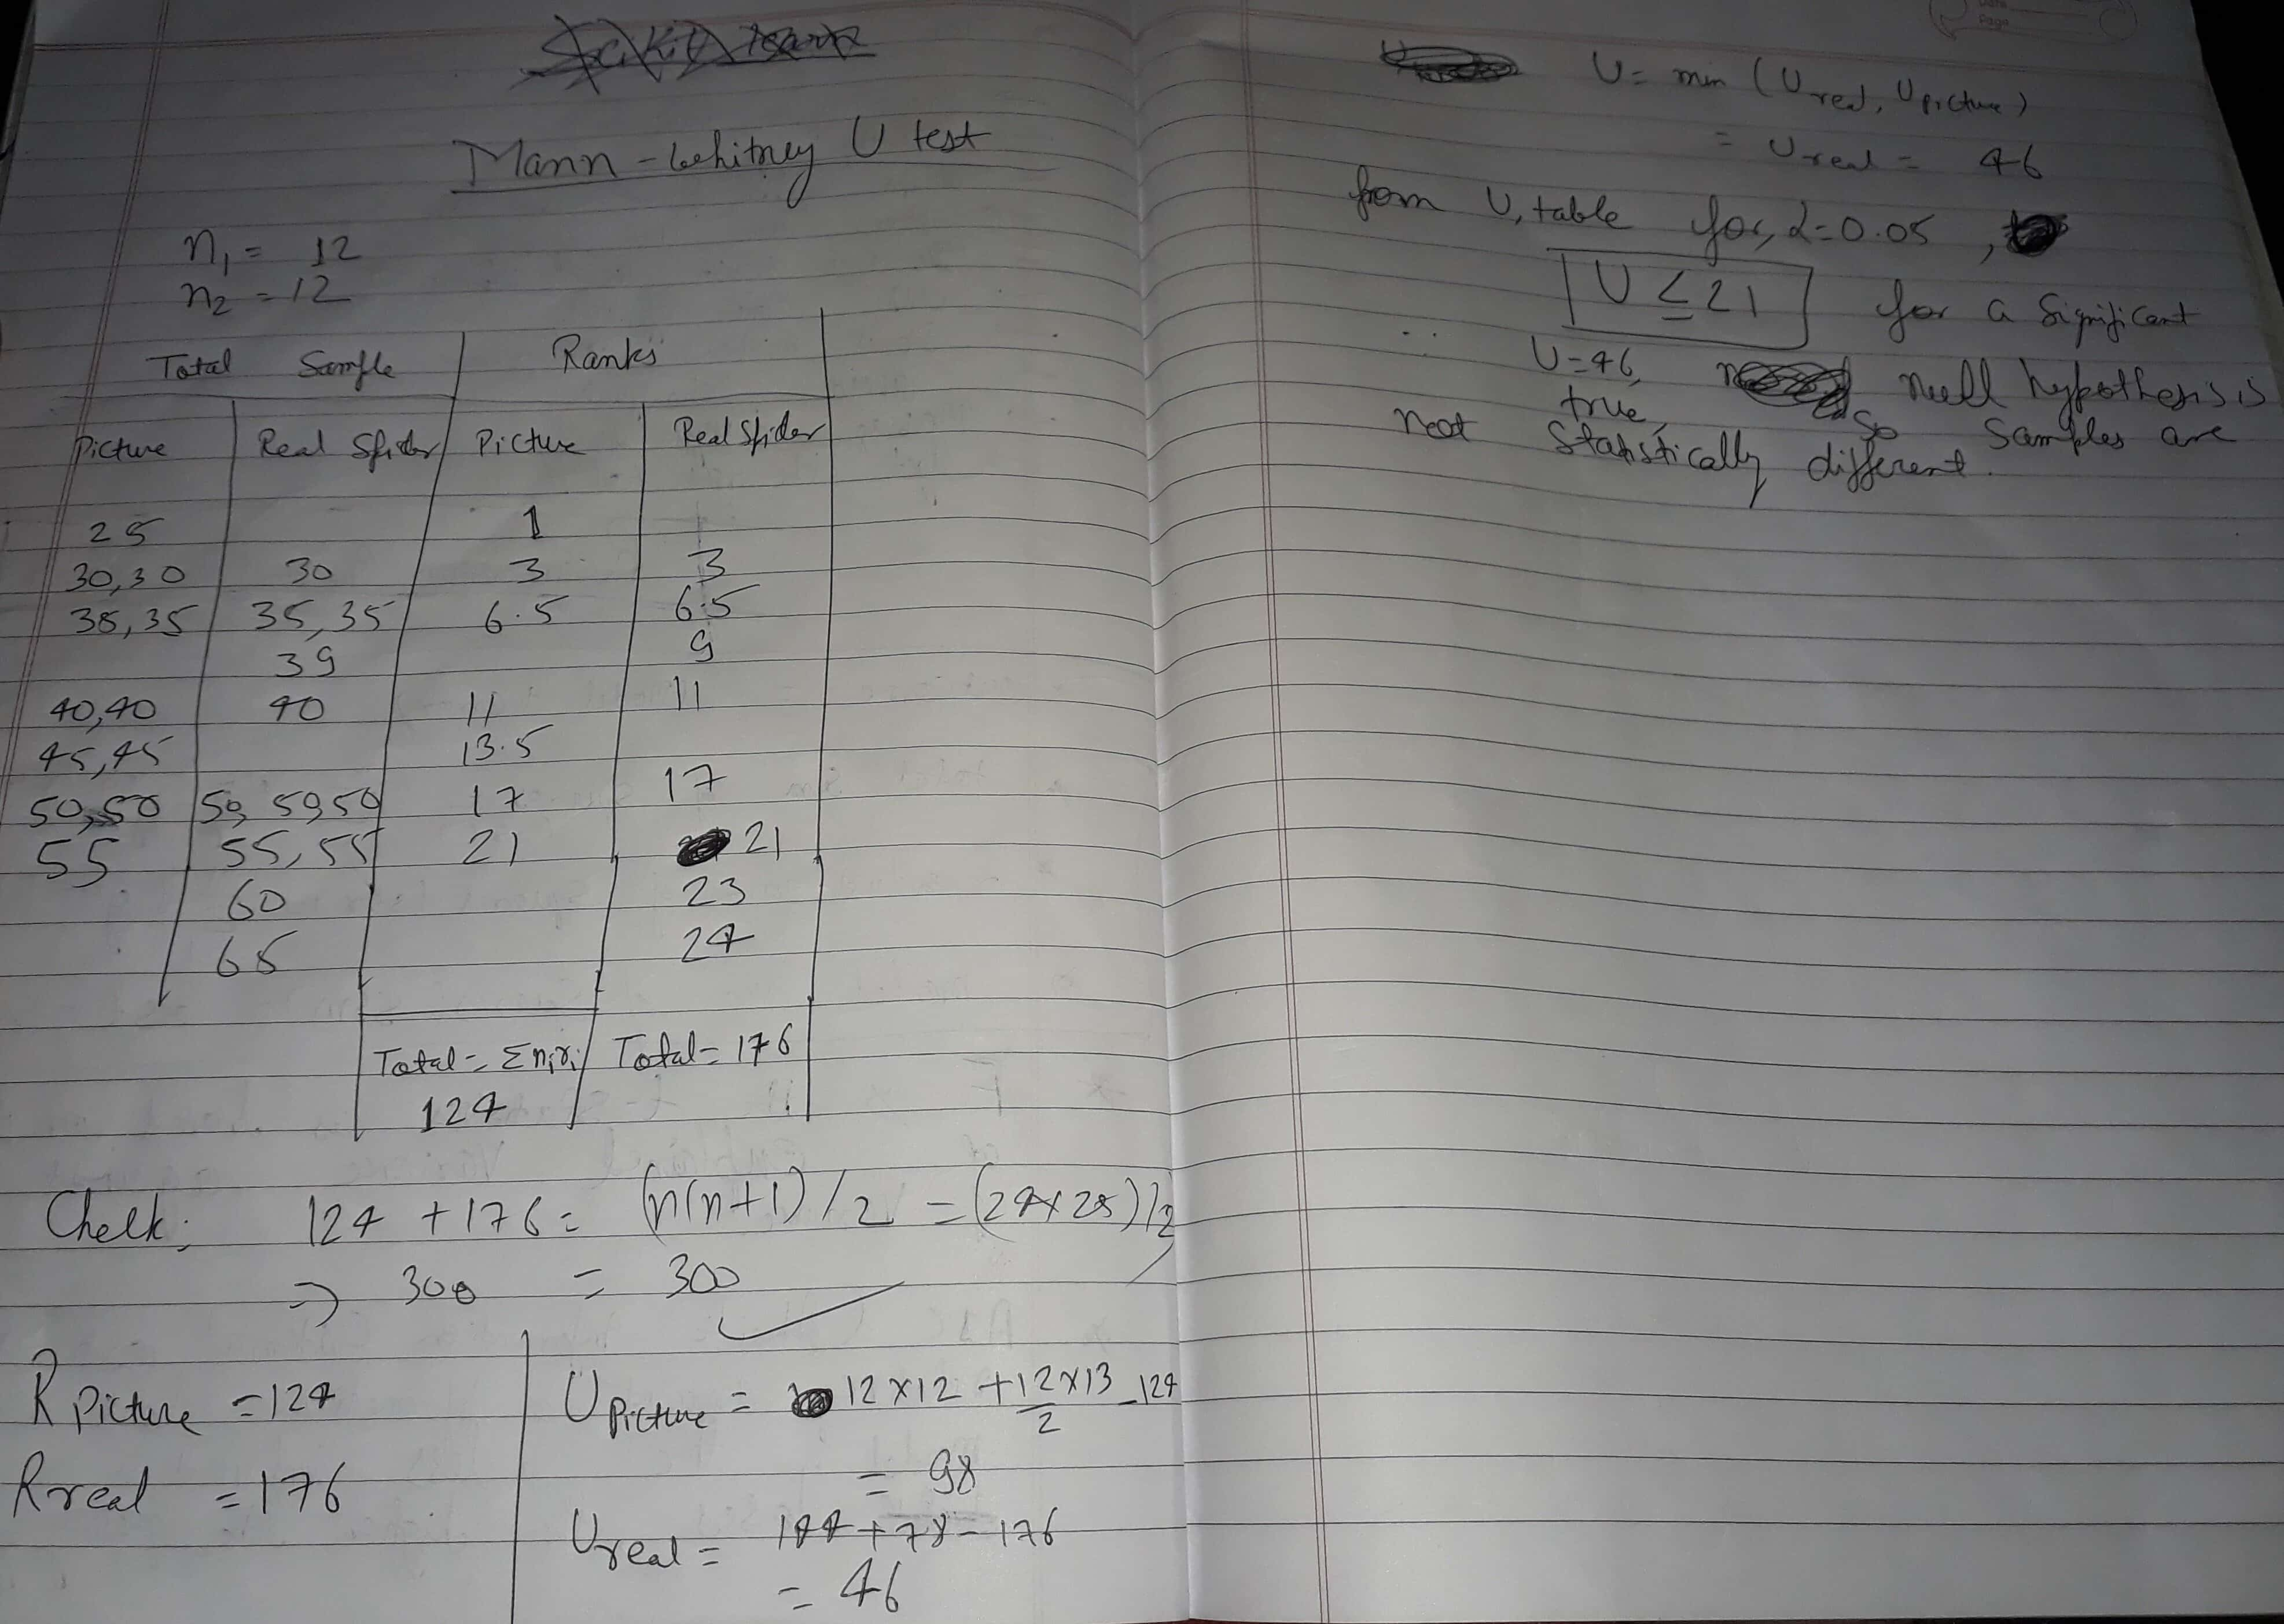

In [110]:
Image('mann_whitney.jpg')

### **Calculating the effect size**

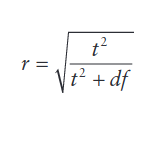

In [111]:
Image('effect_size.png')

In [112]:
t,p = st.ttest_ind(data_p['Anxiety'], data_r['Anxiety'], equal_var=True)
t

-1.681345614953415

In [113]:
df = (12-1) + (12-1)

In [114]:
r = np.sqrt(t**2/(t**2 + df))

In [115]:
r

0.337439210464791

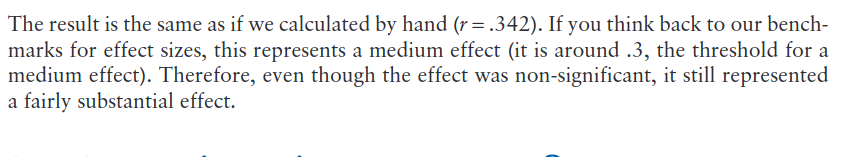

In [116]:
Image('eff.png')

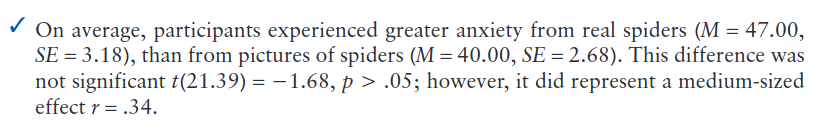

In [117]:
Image('ind_t.png')

### **ii) The dependent t-test**

In [118]:
data_wide

,picture,real,Mean,adj,picture_adj,real_adj
0,30,40,35.0,8.5,38.5,48.5
1,35,35,35.0,8.5,43.5,43.5
2,45,50,47.5,-4.0,41.0,46.0
3,40,55,47.5,-4.0,36.0,51.0
4,50,65,57.5,-14.0,36.0,51.0
5,35,55,45.0,-1.5,33.5,53.5
6,55,50,52.5,-9.0,46.0,41.0
7,25,35,30.0,13.5,38.5,48.5
8,30,30,30.0,13.5,43.5,43.5
9,45,50,47.5,-4.0,41.0,46.0


In [119]:
t, p = st.ttest_rel(data_wide['real'], data_wide['picture'])
print(f'statistic = {t}, pvalue = {p}')

statistic = 2.472533427497901, pvalue = 0.030981783136040896


### ***Calculating the t statistics mathematically***

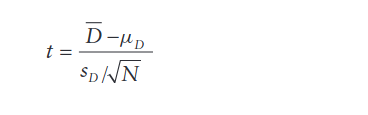

In [120]:
Image('dep_t_test.png')

In [121]:
(data_wide['real'] - data_wide['picture']).describe()

count    12.000000
mean      7.000000
std       9.807233
min     -11.000000
25%       0.000000
50%       7.500000
75%      15.000000
max      20.000000
dtype: float64

In [122]:
se = 9.807233/np.sqrt(12)
se

2.8311043062776906

In [123]:
t = (data_wide['real'] - data_wide['picture']).mean()/se
t

2.4725334154867413

In [124]:
# gettign Confidence Interval mathematically, with the help of t tbale
ci_lower = (data_wide['real'] - data_wide['picture']).mean() - 2.179*se
ci_higher = (data_wide['real'] - data_wide['picture']).mean() + 2.179*se
ci = (ci_lower, ci_higher)
ci

(0.8310237166209129, 13.168976283379088)

### **Robust methods to compare dependent/paired means**

In [125]:
st.wilcoxon(data_wide['real'], data_wide['picture'], correction=False)

WilcoxonResult(statistic=8.0, pvalue=0.045855524379089546)

#### ***shows  that  based  on  this  robust  test  there  is  a  significant  difference  (because  the confidence interval does not cross zero and p is less than .05) in anxiety scores across the two spider groups***

### **Calculating the effect size**

In [126]:
df_paired = 12-1
df_paired

11

In [127]:
t

2.4725334154867413

In [128]:
r_paired = np.sqrt(t**2/(t**2 + df_paired))
r_paired

0.597686912521715

#### effect size of this magnitude  represents a very large effect (it is above .5, the threshold for a large effect). Therefore, as well as being statistically significant, this effect is large and probably substantive finding.

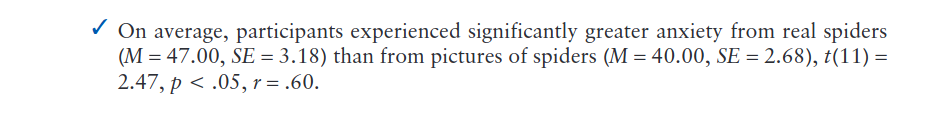

In [129]:
Image('dep.png')